In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score



[*********************100%***********************]  3 of 3 completed


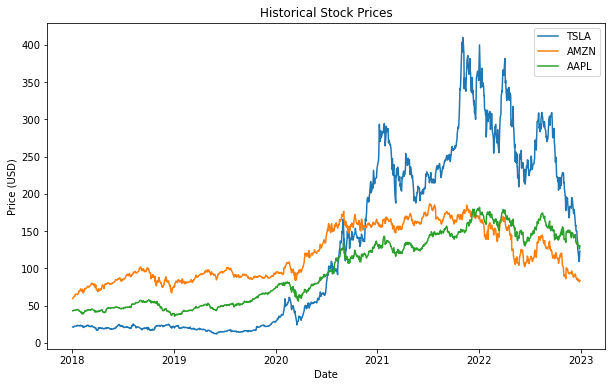

In [2]:


# Define the ticker symbols
tickers = ['TSLA', 'AMZN', 'AAPL']

# Download the historical data
data = yf.download(tickers, start='2018-01-01', end='2023-01-01')

# Select the 'Close' prices
close_prices = data['Close']

# Plot the stock prices
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(close_prices[ticker], label=ticker)

# Set the title and labels
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [3]:


tickers = ['AAPL', 'AMZN', 'TSLA']


# Create an empty DataFrame to store the stock data
price_data = pd.DataFrame()

# Iterate over each ticker
for ticker in tickers:
    # Download the historical data
    data = yf.download(ticker, start='2018-01-01', end='2023-01-01')
    
    # Add a new column to identify the ticker
    data['Symbol'] = ticker

    # Append the data to the stock_data DataFrame
    price_data = price_data.append(data)

# Reset the index of the DataFrame
price_data = price_data.reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
price_data

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.831593,102223600,AAPL
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.824474,118071600,AAPL
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.014103,89738400,AAPL
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.481068,94640000,AAPL
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.326992,82271200,AAPL
...,...,...,...,...,...,...,...,...
3772,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,TSLA
3773,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,TSLA
3774,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,TSLA
3775,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,TSLA


In [5]:
price_data = price_data[['Symbol','Date','Close','High','Low','Open','Volume']]
# sort the values by symbol and then date
price_data.sort_values(by = ['Symbol','Date'], inplace = True)

# calculate the change in price
price_data['change_in_price'] = price_data['Close'].diff()

/Users/heinnthantzaw/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
price_data

,Symbol,Date,Close,High,Low,Open,Volume,change_in_price
0,AAPL,2018-01-02,43.064999,43.075001,42.314999,42.540001,102223600,NaN
1,AAPL,2018-01-03,43.057499,43.637501,42.990002,43.132500,118071600,-0.007500
2,AAPL,2018-01-04,43.257500,43.367500,43.020000,43.134998,89738400,0.200001
3,AAPL,2018-01-05,43.750000,43.842499,43.262501,43.360001,94640000,0.492500
4,AAPL,2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200,-0.162498
...,...,...,...,...,...,...,...,...
3772,TSLA,2022-12-23,123.150002,128.619995,121.019997,126.370003,166989700,-2.199997
3773,TSLA,2022-12-27,109.099998,119.669998,108.760002,117.500000,208643400,-14.050003
3774,TSLA,2022-12-28,112.709999,116.269997,108.239998,110.349998,221070500,3.610001
3775,TSLA,2022-12-29,121.820000,123.570000,117.500000,120.389999,221923300,9.110001


In [7]:
# identify rows where the symbol changes
mask = price_data['Symbol'] != price_data['Symbol'].shift(1)

# For those rows, let's make the value null
price_data['change_in_price'] = np.where(mask == True, np.nan, price_data['change_in_price'])

# print the rows that have a null value, should only be 3
price_data[price_data.isna().any(axis = 1)]

,Symbol,Date,Close,High,Low,Open,Volume,change_in_price
0,AAPL,2018-01-02,43.064999,43.075001,42.314999,42.540001,102223600,NaN
1259,AMZN,2018-01-02,59.450500,59.500000,58.525501,58.599998,53890000,NaN
2518,TSLA,2018-01-02,21.368668,21.474001,20.733334,20.799999,65283000,NaN


In [8]:
# Calculate the 14 day RSI
n = 14

# First make a copy of the data frame twice
up_df, down_df = price_data[['Symbol','change_in_price']].copy(), price_data[['Symbol','change_in_price']].copy()

# For up days, if the change is less than 0 set to 0.
up_df.loc['change_in_price'] = up_df.loc[(up_df['change_in_price'] < 0), 'change_in_price'] = 0

# For down days, if the change is greater than 0 set to 0.
down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0

# We need change in price to be absolute.
down_df['change_in_price'] = down_df['change_in_price'].abs()

# Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are given less weight compared to newer values.
ewma_up = up_df.groupby('Symbol')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
ewma_down = down_df.groupby('Symbol')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

# Calculate the Relative Strength
relative_strength = ewma_up / ewma_down

# Calculate the Relative Strength Index
relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

# Add the info to the data frame.
price_data['down_days'] = down_df['change_in_price']
price_data['up_days'] = up_df['change_in_price']
price_data['RSI'] = relative_strength_index

# Display the head.
price_data.head(30)

,Symbol,Date,Close,High,Low,Open,Volume,change_in_price,down_days,up_days,RSI
0,AAPL,2018-01-02,43.064999,43.075001,42.314999,42.540001,102223600,NaN,NaN,NaN,NaN
1,AAPL,2018-01-03,43.057499,43.637501,42.990002,43.132500,118071600,-0.007500,0.007500,0.000000,0.000000
2,AAPL,2018-01-04,43.257500,43.367500,43.020000,43.134998,89738400,0.200001,0.000000,0.200001,96.852436
3,AAPL,2018-01-05,43.750000,43.842499,43.262501,43.360001,94640000,0.492500,0.000000,0.492500,99.161076
4,AAPL,2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200,-0.162498,0.162498,0.000000,77.515824
5,AAPL,2018-01-09,43.582500,43.764999,43.352501,43.637501,86336000,-0.005001,0.005001,0.000000,76.919586
6,AAPL,2018-01-10,43.572498,43.575001,43.250000,43.290001,95839600,-0.010002,0.010002,0.000000,75.578048
7,AAPL,2018-01-11,43.820000,43.872501,43.622501,43.647499,74670800,0.247501,0.000000,0.247501,83.696580
8,AAPL,2018-01-12,44.272499,44.340000,43.912498,44.044998,101672400,0.452499,0.000000,0.452499,90.416913
9,AAPL,2018-01-16,44.047501,44.847500,44.035000,44.474998,118263600,-0.224998,0.224998,0.000000,73.123570


In [9]:
# Calculate the Stochastic Oscillator
n = 14

# Make a copy of the high and low column.
low_14, high_14 = price_data[['Symbol','Low']].copy(), price_data[['Symbol','High']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14.groupby('Symbol')['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Symbol')['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate the Stochastic Oscillator.
k_percent = 100 * ((price_data['Close'] - low_14) / (high_14 - low_14))

# Add the info to the data frame.
price_data['low_14'] = low_14
price_data['high_14'] = high_14
price_data['k_percent'] = k_percent

# Display the head.
price_data.head(30)

,Symbol,Date,Close,High,Low,Open,Volume,change_in_price,down_days,up_days,RSI,low_14,high_14,k_percent
0,AAPL,2018-01-02,43.064999,43.075001,42.314999,42.540001,102223600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,2018-01-03,43.057499,43.637501,42.990002,43.132500,118071600,-0.007500,0.007500,0.000000,0.000000,NaN,NaN,NaN
2,AAPL,2018-01-04,43.257500,43.367500,43.020000,43.134998,89738400,0.200001,0.000000,0.200001,96.852436,NaN,NaN,NaN
3,AAPL,2018-01-05,43.750000,43.842499,43.262501,43.360001,94640000,0.492500,0.000000,0.492500,99.161076,NaN,NaN,NaN
4,AAPL,2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200,-0.162498,0.162498,0.000000,77.515824,NaN,NaN,NaN
5,AAPL,2018-01-09,43.582500,43.764999,43.352501,43.637501,86336000,-0.005001,0.005001,0.000000,76.919586,NaN,NaN,NaN
6,AAPL,2018-01-10,43.572498,43.575001,43.250000,43.290001,95839600,-0.010002,0.010002,0.000000,75.578048,NaN,NaN,NaN
7,AAPL,2018-01-11,43.820000,43.872501,43.622501,43.647499,74670800,0.247501,0.000000,0.247501,83.696580,NaN,NaN,NaN
8,AAPL,2018-01-12,44.272499,44.340000,43.912498,44.044998,101672400,0.452499,0.000000,0.452499,90.416913,NaN,NaN,NaN
9,AAPL,2018-01-16,44.047501,44.847500,44.035000,44.474998,118263600,-0.224998,0.224998,0.000000,73.123570,NaN,NaN,NaN


In [10]:
# Calculate the Williams %R
n = 14

# Make a copy of the high and low column.
low_14, high_14 = price_data[['Symbol','Low']].copy(), price_data[['Symbol','High']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14.groupby('Symbol')['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Symbol')['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate William %R indicator.
r_percent = ((high_14 - price_data['Close']) / (high_14 - low_14)) * - 100

# Add the info to the data frame.
price_data['r_percent'] = r_percent

# Display the head.
price_data.head(30)

,Symbol,Date,Close,High,Low,Open,Volume,change_in_price,down_days,up_days,RSI,low_14,high_14,k_percent,r_percent
0,AAPL,2018-01-02,43.064999,43.075001,42.314999,42.540001,102223600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,2018-01-03,43.057499,43.637501,42.990002,43.132500,118071600,-0.007500,0.007500,0.000000,0.000000,NaN,NaN,NaN,NaN
2,AAPL,2018-01-04,43.257500,43.367500,43.020000,43.134998,89738400,0.200001,0.000000,0.200001,96.852436,NaN,NaN,NaN,NaN
3,AAPL,2018-01-05,43.750000,43.842499,43.262501,43.360001,94640000,0.492500,0.000000,0.492500,99.161076,NaN,NaN,NaN,NaN
4,AAPL,2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200,-0.162498,0.162498,0.000000,77.515824,NaN,NaN,NaN,NaN
5,AAPL,2018-01-09,43.582500,43.764999,43.352501,43.637501,86336000,-0.005001,0.005001,0.000000,76.919586,NaN,NaN,NaN,NaN
6,AAPL,2018-01-10,43.572498,43.575001,43.250000,43.290001,95839600,-0.010002,0.010002,0.000000,75.578048,NaN,NaN,NaN,NaN
7,AAPL,2018-01-11,43.820000,43.872501,43.622501,43.647499,74670800,0.247501,0.000000,0.247501,83.696580,NaN,NaN,NaN,NaN
8,AAPL,2018-01-12,44.272499,44.340000,43.912498,44.044998,101672400,0.452499,0.000000,0.452499,90.416913,NaN,NaN,NaN,NaN
9,AAPL,2018-01-16,44.047501,44.847500,44.035000,44.474998,118263600,-0.224998,0.224998,0.000000,73.123570,NaN,NaN,NaN,NaN


In [11]:
# Calculate the MACD
ema_26 = price_data.groupby('Symbol')['Close'].transform(lambda x: x.ewm(span = 26).mean())
ema_12 = price_data.groupby('Symbol')['Close'].transform(lambda x: x.ewm(span = 12).mean())
macd = ema_12 - ema_26

# Calculate the EMA
ema_9_macd = macd.ewm(span = 9).mean()

# Store the data in the data frame.
price_data['MACD'] = macd
price_data['MACD_EMA'] = ema_9_macd

# Print the head.
price_data.head(30)

,Symbol,Date,Close,High,Low,Open,Volume,change_in_price,down_days,up_days,RSI,low_14,high_14,k_percent,r_percent,MACD,MACD_EMA
0,AAPL,2018-01-02,43.064999,43.075001,42.314999,42.540001,102223600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,AAPL,2018-01-03,43.057499,43.637501,42.990002,43.132500,118071600,-0.007500,0.007500,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.000168,-0.000093
2,AAPL,2018-01-04,43.257500,43.367500,43.020000,43.134998,89738400,0.200001,0.000000,0.200001,96.852436,NaN,NaN,NaN,NaN,0.005988,0.002399
3,AAPL,2018-01-05,43.750000,43.842499,43.262501,43.360001,94640000,0.492500,0.000000,0.492500,99.161076,NaN,NaN,NaN,NaN,0.026422,0.010537
4,AAPL,2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200,-0.162498,0.162498,0.000000,77.515824,NaN,NaN,NaN,NaN,0.030504,0.016476
5,AAPL,2018-01-09,43.582500,43.764999,43.352501,43.637501,86336000,-0.005001,0.005001,0.000000,76.919586,NaN,NaN,NaN,NaN,0.032170,0.020730
6,AAPL,2018-01-10,43.572498,43.575001,43.250000,43.290001,95839600,-0.010002,0.010002,0.000000,75.578048,NaN,NaN,NaN,NaN,0.032231,0.023641
7,AAPL,2018-01-11,43.820000,43.872501,43.622501,43.647499,74670800,0.247501,0.000000,0.247501,83.696580,NaN,NaN,NaN,NaN,0.043525,0.028419
8,AAPL,2018-01-12,44.272499,44.340000,43.912498,44.044998,101672400,0.452499,0.000000,0.452499,90.416913,NaN,NaN,NaN,NaN,0.073134,0.038749
9,AAPL,2018-01-16,44.047501,44.847500,44.035000,44.474998,118263600,-0.224998,0.224998,0.000000,73.123570,NaN,NaN,NaN,NaN,0.081484,0.048324


In [12]:
# Calculate the Price Rate of Change
n = 9

# Calculate the Rate of Change in the Price, and store it in the Data Frame.
price_data['Price_Rate_Of_Change'] = price_data.groupby('Symbol')['Close'].transform(lambda x: x.pct_change(periods = n))

# Print the first 30 rows
price_data.head(30)

,Symbol,Date,Close,High,Low,Open,Volume,change_in_price,down_days,up_days,RSI,low_14,high_14,k_percent,r_percent,MACD,MACD_EMA,Price_Rate_Of_Change
0,AAPL,2018-01-02,43.064999,43.075001,42.314999,42.540001,102223600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
1,AAPL,2018-01-03,43.057499,43.637501,42.990002,43.132500,118071600,-0.007500,0.007500,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.000168,-0.000093,NaN
2,AAPL,2018-01-04,43.257500,43.367500,43.020000,43.134998,89738400,0.200001,0.000000,0.200001,96.852436,NaN,NaN,NaN,NaN,0.005988,0.002399,NaN
3,AAPL,2018-01-05,43.750000,43.842499,43.262501,43.360001,94640000,0.492500,0.000000,0.492500,99.161076,NaN,NaN,NaN,NaN,0.026422,0.010537,NaN
4,AAPL,2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200,-0.162498,0.162498,0.000000,77.515824,NaN,NaN,NaN,NaN,0.030504,0.016476,NaN
5,AAPL,2018-01-09,43.582500,43.764999,43.352501,43.637501,86336000,-0.005001,0.005001,0.000000,76.919586,NaN,NaN,NaN,NaN,0.032170,0.020730,NaN
6,AAPL,2018-01-10,43.572498,43.575001,43.250000,43.290001,95839600,-0.010002,0.010002,0.000000,75.578048,NaN,NaN,NaN,NaN,0.032231,0.023641,NaN
7,AAPL,2018-01-11,43.820000,43.872501,43.622501,43.647499,74670800,0.247501,0.000000,0.247501,83.696580,NaN,NaN,NaN,NaN,0.043525,0.028419,NaN
8,AAPL,2018-01-12,44.272499,44.340000,43.912498,44.044998,101672400,0.452499,0.000000,0.452499,90.416913,NaN,NaN,NaN,NaN,0.073134,0.038749,NaN
9,AAPL,2018-01-16,44.047501,44.847500,44.035000,44.474998,118263600,-0.224998,0.224998,0.000000,73.123570,NaN,NaN,NaN,NaN,0.081484,0.048324,0.022814


In [13]:
def obv(group):

    # Grab the volume and close column.
    volume = group['Volume']
    change = group['Close'].diff()

    # intialize the previous OBV
    prev_obv = 0
    obv_values = []

    # calculate the On Balance Volume
    for i, j in zip(change, volume):

        if i > 0:
            current_obv = prev_obv + j
        elif i < 0:
            current_obv = prev_obv - j
        else:
            current_obv = prev_obv

        # OBV.append(current_OBV)
        prev_obv = current_obv
        obv_values.append(current_obv)
    
    # Return a panda series.
    return pd.Series(obv_values, index = group.index)
        

# apply the function to each group
obv_groups = price_data.groupby('Symbol').apply(obv)

# add to the data frame, but drop the old index, before adding it.
price_data['On Balance Volume'] = obv_groups.reset_index(level=0, drop=True)

# display the data frame.
price_data.head(30)

,Symbol,Date,Close,High,Low,Open,Volume,change_in_price,down_days,up_days,RSI,low_14,high_14,k_percent,r_percent,MACD,MACD_EMA,Price_Rate_Of_Change,On Balance Volume
0,AAPL,2018-01-02,43.064999,43.075001,42.314999,42.540001,102223600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0
1,AAPL,2018-01-03,43.057499,43.637501,42.990002,43.132500,118071600,-0.007500,0.007500,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.000168,-0.000093,NaN,-118071600
2,AAPL,2018-01-04,43.257500,43.367500,43.020000,43.134998,89738400,0.200001,0.000000,0.200001,96.852436,NaN,NaN,NaN,NaN,0.005988,0.002399,NaN,-28333200
3,AAPL,2018-01-05,43.750000,43.842499,43.262501,43.360001,94640000,0.492500,0.000000,0.492500,99.161076,NaN,NaN,NaN,NaN,0.026422,0.010537,NaN,66306800
4,AAPL,2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200,-0.162498,0.162498,0.000000,77.515824,NaN,NaN,NaN,NaN,0.030504,0.016476,NaN,-15964400
5,AAPL,2018-01-09,43.582500,43.764999,43.352501,43.637501,86336000,-0.005001,0.005001,0.000000,76.919586,NaN,NaN,NaN,NaN,0.032170,0.020730,NaN,-102300400
6,AAPL,2018-01-10,43.572498,43.575001,43.250000,43.290001,95839600,-0.010002,0.010002,0.000000,75.578048,NaN,NaN,NaN,NaN,0.032231,0.023641,NaN,-198140000
7,AAPL,2018-01-11,43.820000,43.872501,43.622501,43.647499,74670800,0.247501,0.000000,0.247501,83.696580,NaN,NaN,NaN,NaN,0.043525,0.028419,NaN,-123469200
8,AAPL,2018-01-12,44.272499,44.340000,43.912498,44.044998,101672400,0.452499,0.000000,0.452499,90.416913,NaN,NaN,NaN,NaN,0.073134,0.038749,NaN,-21796800
9,AAPL,2018-01-16,44.047501,44.847500,44.035000,44.474998,118263600,-0.224998,0.224998,0.000000,73.123570,NaN,NaN,NaN,NaN,0.081484,0.048324,0.022814,-140060400


In [14]:
# Create a column we wish to predict
'''
    In this case, let's create an output column that will be 1 if the closing price at time 't' is greater than 't-1' and 0 otherwise.
    In other words, if the today's closing price is greater than yesterday's closing price it would be 1.
'''

# Group by the `Symbol` column, then grab the `Close` column.
close_groups = price_data.groupby('Symbol')['Close']

# Apply the lambda function which will return -1.0 for down, 1.0 for up and 0.0 for no change.
close_groups = close_groups.transform(lambda x : np.sign(x.diff()))

# add the data to the main dataframe.
price_data['Prediction'] = close_groups

# Print the head.
price_data.head(15)

,Symbol,Date,Close,High,Low,Open,Volume,change_in_price,down_days,up_days,RSI,low_14,high_14,k_percent,r_percent,MACD,MACD_EMA,Price_Rate_Of_Change,On Balance Volume,Prediction
0,AAPL,2018-01-02,43.064999,43.075001,42.314999,42.540001,102223600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0,NaN
1,AAPL,2018-01-03,43.057499,43.637501,42.990002,43.132500,118071600,-0.007500,0.007500,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.000168,-0.000093,NaN,-118071600,-1.0
2,AAPL,2018-01-04,43.257500,43.367500,43.020000,43.134998,89738400,0.200001,0.000000,0.200001,96.852436,NaN,NaN,NaN,NaN,0.005988,0.002399,NaN,-28333200,1.0
3,AAPL,2018-01-05,43.750000,43.842499,43.262501,43.360001,94640000,0.492500,0.000000,0.492500,99.161076,NaN,NaN,NaN,NaN,0.026422,0.010537,NaN,66306800,1.0
4,AAPL,2018-01-08,43.587502,43.902500,43.482498,43.587502,82271200,-0.162498,0.162498,0.000000,77.515824,NaN,NaN,NaN,NaN,0.030504,0.016476,NaN,-15964400,-1.0
5,AAPL,2018-01-09,43.582500,43.764999,43.352501,43.637501,86336000,-0.005001,0.005001,0.000000,76.919586,NaN,NaN,NaN,NaN,0.032170,0.020730,NaN,-102300400,-1.0
6,AAPL,2018-01-10,43.572498,43.575001,43.250000,43.290001,95839600,-0.010002,0.010002,0.000000,75.578048,NaN,NaN,NaN,NaN,0.032231,0.023641,NaN,-198140000,-1.0
7,AAPL,2018-01-11,43.820000,43.872501,43.622501,43.647499,74670800,0.247501,0.000000,0.247501,83.696580,NaN,NaN,NaN,NaN,0.043525,0.028419,NaN,-123469200,1.0
8,AAPL,2018-01-12,44.272499,44.340000,43.912498,44.044998,101672400,0.452499,0.000000,0.452499,90.416913,NaN,NaN,NaN,NaN,0.073134,0.038749,NaN,-21796800,1.0
9,AAPL,2018-01-16,44.047501,44.847500,44.035000,44.474998,118263600,-0.224998,0.224998,0.000000,73.123570,NaN,NaN,NaN,NaN,0.081484,0.048324,0.022814,-140060400,-1.0


In [15]:
# We need to remove all rows that have an NaN value.
print('Before NaN Drop we have {} rows and {} columns'.format(price_data.shape[0], price_data.shape[1]))

# Any row that has a `NaN` value will be dropped.
price_data = price_data.dropna()

# Display how much we have left now.
print('After NaN Drop we have {} rows and {} columns'.format(price_data.shape[0], price_data.shape[1]))

# Print the head.
price_data.head()

Before NaN Drop we have 3777 rows and 20 columns
After NaN Drop we have 3738 rows and 20 columns


,Symbol,Date,Close,High,Low,Open,Volume,change_in_price,down_days,up_days,RSI,low_14,high_14,k_percent,r_percent,MACD,MACD_EMA,Price_Rate_Of_Change,On Balance Volume,Prediction
13,AAPL,2018-01-22,44.250000,44.445000,44.150002,44.325001,108434400,-0.365002,0.365002,0.000000,57.980011,42.314999,45.025002,71.402188,-28.597812,0.153018,0.113174,0.015199,-115874400,-1.0
14,AAPL,2018-01-23,44.259998,44.860001,44.205002,44.325001,130756400,0.009998,0.000000,0.009998,58.262315,42.990002,45.025002,62.407702,-37.592298,0.140103,0.118756,0.015545,14882000,1.0
15,AAPL,2018-01-24,43.555000,44.325001,43.299999,44.312500,204420400,-0.704998,0.704998,0.000000,37.671178,43.020000,45.025002,26.683270,-73.316730,0.085785,0.111971,-0.000402,-189538400,-1.0
16,AAPL,2018-01-25,42.777500,43.737499,42.632500,43.627499,166116000,-0.777500,0.777500,0.000000,25.984939,42.632500,45.025002,6.060621,-93.939379,-0.004820,0.088075,-0.023790,-355654400,-1.0
17,AAPL,2018-01-26,42.877499,43.000000,42.514999,43.000000,156572000,0.099998,0.000000,0.099998,29.242402,42.514999,45.025002,14.442188,-85.557812,-0.067845,0.056319,-0.031509,-199082400,1.0


In [16]:
# Grab our X & Y Columns.
X_Cols = price_data[['RSI','k_percent','r_percent','Price_Rate_Of_Change','MACD','On Balance Volume']]
Y_Cols = price_data['Prediction']

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 0)

# Create a Random Forest Classifier
rand_frst_clf = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)

# Fit the data to the model
rand_frst_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_frst_clf.predict(X_test)



In [17]:

print('Correct Prediction (%): ', accuracy_score(y_test, rand_frst_clf.predict(X_test), normalize = True) * 100.0)

Correct Prediction (%):  70.16042780748664


In [18]:
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store the cross-validation scores
cross_val_scores = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(X_Cols):
    X_train, X_test = X_Cols.iloc[train_index], X_Cols.iloc[test_index]
    y_train, y_test = Y_Cols.iloc[train_index], Y_Cols.iloc[test_index]
    
    # Create a Random Forest Classifier
    rand_frst_clf = RandomForestClassifier(n_estimators=100, oob_score=True, criterion="gini", random_state=0)

    # Fit the data to the model
    rand_frst_clf.fit(X_train, y_train)

    # Make predictions
    y_pred = rand_frst_clf.predict(X_test)

    # Calculate and store the cross-validation score
    cross_val_scores.append(accuracy_score(y_test, y_pred))

# Convert the cross-validation scores to a NumPy array
cross_val_scores = np.array(cross_val_scores)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))


Cross-Validation Scores: [0.67094703 0.68539326 0.68218299 0.67094703 0.60995185]
Mean Cross-Validation Score: 0.6638844301765651


In [19]:
# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=10)

# Initialize lists to store the cross-validation scores
cross_val_scores = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(X_Cols):
    X_train, X_test = X_Cols.iloc[train_index], X_Cols.iloc[test_index]
    y_train, y_test = Y_Cols.iloc[train_index], Y_Cols.iloc[test_index]
    
    # Create a Random Forest Classifier
    rand_frst_clf = RandomForestClassifier(n_estimators=100, oob_score=True, criterion="gini", random_state=0)

    # Fit the data to the model
    rand_frst_clf.fit(X_train, y_train)

    # Make predictions
    y_pred = rand_frst_clf.predict(X_test)

    # Calculate and store the cross-validation score
    cross_val_scores.append(accuracy_score(y_test, y_pred))

# Convert the cross-validation scores to a NumPy array
cross_val_scores = np.array(cross_val_scores)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))



Cross-Validation Scores: [0.69616519 0.66371681 0.69616519 0.71091445 0.69911504 0.69616519
 0.69616519 0.68731563 0.59882006 0.68141593]
Mean Cross-Validation Score: 0.6825958702064897


In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_str)


Accuracy: 0.6814159292035398
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.67      0.65      0.66       161
         0.0       0.00      0.00      0.00         1
         1.0       0.69      0.71      0.70       177

    accuracy                           0.68       339
   macro avg       0.45      0.45      0.45       339
weighted avg       0.68      0.68      0.68       339



/Users/heinnthantzaw/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/heinnthantzaw/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/heinnthantzaw/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.6814159292035398
Precision: 0.6791570415174072
Recall: 0.6814159292035398
F1-score: 0.6801066413556294
Confusion Matrix:
[[105   0  56]
 [  0   0   1]
 [ 51   0 126]]


/Users/heinnthantzaw/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
